# Modelagem e Simulação Multifísica - Aula 04

## O Levitador Magnético

## 1 - Geometria do problema. 

Considere o levitador magnético da figura a seguir: 
O dispositivo é composto por um núcleo ferromagnético com permeabilidade $\mu$ elevada (geralmente não linear) enrolada por uma bobina de cobre com $N$ espiras. O dispositivo é usado para equilibrar a esfera magnética de massa $m$ à uma distância $x$, medida a partir da base do núcleo. Em condição de equilíbrio, a força magnética $f_m$ é igual à força gravitacional $f_g$. Entretanto, é fácil perceber que essa é uma condição de equilíbrio instável. Para garantir a estabilidade do sistema, a posição da massa deve ser monitorada e a tensão $u(t)$ controlada (operação em malha fechada). Devido às suas não-linearidades, o projeto de controladores para esse tipo de dispositivo é um tema importante na teoria de controle e possui diversas aplicações práticas, como por exemplo, no projeto de rolamentos magnéticos ou em trens de alta velocidade.      

<p>
    <img width="450" height="100" src="Figs/LevitadorGeo.png">
</p>

Não é objetivo dessa disciplina projetar controladores para o levitador magnético, e sim compreender e modelar as físicas que governam o comportamento do mesmo.

## 2 - O problema de valor inicial

### 2.1 - O modelo circuital equivalente.

Do ponto de vista dos terminais da fonte, o dispositivo pode ser substituído por um modelo de circuito equivalente, desde que a relação entre a tesão e a corrente da fonte seja satisfatoriamente representada. Uma possível representação para o circuito equivalente é apresentada a seguir:

<p>
    <img width="350" height="100" src="Figs/LevitadorCirc.png">
</p>

No circuito, $R$ representa a resistência do fio da bobina, e pode ser estimado pela seção transversal do fio, seu comprimento total e sua condutividade $\sigma$. Em princípio, a condutividade de um condutor é função de sua temperatura, mas para a maioria das aplicações $R$ pode ser considerado constante. 

A indutância $L$ é obtida pela relação entre o fluxo magnético concatenado na bobina e a corrente $i$. O fluxo magnético por sua vez é função da geometria do levitador (que varia com a posição da esfera) e das permeabilidades magnéticas do núcleo e da esfera. Como o núcleo magnético é geralmente não linear, a indutância seria também função da intensidade da corrente, elevando consideravelmente a complexidade do comportamento da indutância. Felizmente, o problema pode ser linearizado em função da corrente de equilíbrio. Como consequência a indutância passa a ser apenas função da posição da esfera, ou seja $L=f(x)$. Geralmente, a relação entre a indutância e a posição é modelada como:

\begin{equation}
L(x) = \frac{k}{x}
\end{equation}

onde $k$ é uma constante obtida experimentalmente. 

A condutância $G$ representa as perdas no interior do núcleo magnético. Tais perdas podem ser oriundas de correntes parasitas (correntes de Foucault) ou também devidas à magnetização e desmagnetização do núcleo (histerese). Tais efeitos são mais significantes à medida que a frequência de operação do circuito aumenta. Para o levitador estudado, esses efeitos serão ignorados.

Por fim, a força contraeletromotriz $e$ é relacionada ao trabalho realizado sobre a esfera. Ela é obtida a partir do produto do fator de força $Bl$ e a velocidade da esfera. O fator de força, por sua vez, é obtido pela razão entre a força magnética e a corrente do circuito.

\begin{equation}
Bl = \frac{f_m}{i}
\end{equation}

Assim como a indutância, a força magnética possui comportamento não linear, logo $f_m=f(x,i)$. Geralmente essa relação é aproximada pela seguinte relação quadrática:

\begin{equation}
f_m = \frac{k}{2}\left(\frac{i^2}{x^2}\right)
\end{equation}

Adicionalmente, como a força contraeletromotriz $e$ pode ser muito menor do que a tensão no indutor, é comum ver na literatura modelos que desconsideram esse fator. Nesse caso o circuito equivalente se reduz a um circuito RL série e o trabalho realizado sobre a esfera pode ser estimado a partir da variação da energia armazenada no campo magnético.  

#### 2.1.1 - Aplicando a lei de Kirchhoff das tensões

Assumindo que as perdas no núcleo não são significativas ($G=0$), a lei de Kirchhoff das tensões (LKT) do circuito é dada por:

\begin{equation}
u(t) = Ri(t) + L\frac{di(t)}{dt} + Bl\frac{dx(t)}{dt}
\end{equation}

Sendo essa a equação diferencial ordinária que governa o comportamento do circuito. É importante lembrar que $L(x)$ e $Bl(x,i)$ não são constantes e que a equação governante é não linear. Entretanto, para pequenos deslocamentos da esfera, é possível linearizar a equação em relação ao ponto de equilíbrio. 

#### 2.1.2 - Conservação de energia

Multiplicando a equação anterior por $i(t)$ obtemos:

\begin{equation}
u(t)i(t) = Ri(t)^2 + Li(t)\frac{di(t)}{dt} + Bli(t)\frac{dx(t)}{dt}
\end{equation}

onde:
* $p(t) = u(t)i(t)$ é a potência instantânea fornecida pela fonte, 
* $Ri(t)^2$ representa as perdas por efeito Joule
* O segundo termo do lado direito representa a variação da energia armazenada no campo magnetico,

\begin{equation}
\frac{d}{dt} \left( \frac{1}{2}Li(t)^2 \right) = Li(t)\frac{di(t)}{dt}
\end{equation}

repare que a equação acima assume desprezível a variação da indutância com o tempo.

* O último termo representa a potência mecânica, onde $v$ é a velocidade da esfera.

\begin{equation}
 f_m v = Bli(t)\frac{dx(t)}{dt}
\end{equation}

### 2.3 - O modelo mecânico

A equação diferencial que descreve a posição da esfera é dada pela segunda lei de Newton, sendo que as forças atuantes na esfera são a força magnética e a força gravitacional $f_g$

\begin{eqnarray}
f &=& m \ddot x \\
f &=& f_g - f_m  \\
m \ddot x &=& mg - f_m \\
\end{eqnarray}

Onde $g$ é a aceleração da gravidade. 

### 2.4 - Equações governantes e condição inicial

O problema de valor inicial é então dado pelo sistema de equações formado pelos modelos circuital e mecânico. 
A unicidade da solução é dada por meio da corrente inicial $i(0)$, a posição $x(0)$ e velocidade inicial $v(0)$ . 

\begin{eqnarray}
\dot i &=& \frac{u}{L(x)} - \frac{R}{L(x)}i - \frac{Bl(i,x)}{L(x)}\dot x\\
\ddot x &=& g - \frac{f_m(i,x)}{m} \\
\end{eqnarray}

## 3 - Representação por espaço de estados

Usando a representação por espaço de estados, o sistema anterior deve ser reescrito por meio de equações diferenciais de primeira ordem. Para isso, iremos definir o vetor de variáveis de estado como sendo (i,x,v) e o sistema pode ser reescrito como:

\begin{eqnarray}
\dot i &=& - \frac{R}{L(x)}i - \frac{Bl(i,x)}{L(x)} v + \frac{u}{L(x)}\\
\dot x &=& v \\
\dot v &=& g - \frac{f_m(i,x)}{m}
\end{eqnarray}

## 4 - Ponto de operação e Equilíbrio instável

Para ilustrar a instabilidade em malha aberta, iremos usar como exemplo o levitador magnético disponível no laboratório de controle do Departamento de Engenharia Eletrônica da UFMG.
<p>
    <img width="250" height="100" src="Figs/LevitadorReal.png">
</p>
<p>
    <em> <a href="https://www.lehigh.edu/~inconsy/lab/frames/experiments/FEEDBACK-Maglev_User_Manual.pdf"> Levitador magnético Feedback Instruments </a>. Fonte: https://www.feedback-instruments.com</em>
</p>

Existem diversos trabalhos na literatura relacionados a esse levitador. Alguns trabalhos são apresentados a seguir. Reparem que os parâmetros apresentados divergem consideravelmente devido à escolha do ponto de operação e do modelo adotado.  

### Parâmetros Choudhary
Parâmetros apresentados por <a href="https://www.wseas.org/multimedia/journals/systems/2014/a065702-363.pdf"> SANTOSH KR. CHOUDHARY </a> em "Robust Feedback Control Analysis of Magnetic Levitation System", WSEAS TRANSACTIONS on SYSTEMS, Vol 3, 2014.

In [ ]:
# Magnetic Levitation parameters presented by Choudhary in the paper: 
# Robust Feedback Control Analysis of Magnetic Levitation System, WSEAS TRANSACTIONS on SYSTEMS, 2014.
import numpy as np

# Magnetic force fm
def fm(i,x):
    return k/2*i*i/x/x

# The equilibrium point
i0 = 0.8 #Ampere (A)
x0 = 0.012 # meter (m)

# Parameters
g = 9.82 # (m/s^2) # free-fall acceleration. Dado nao disponível no artigo
m = 0.068 # (Kg)
R = 10 # ohms (Ω)
L = 0.4125 # Henry (H)
k = 6.53e-5 # (Nm^2/A^2)

#i0 = np.sqrt(g*m*(x0)*(x0)/k*2); # Forcing the balance analytically
#print("    i0 = ",i0)
#print("    L = ",k/x0)

print("\nAt equilibrium:")
print("    fm = ",fm(i0,x0))
print("    mg = ",m*g)
print("    fm/fg (%) = ",fm(i0,x0)/(m*g)*100, "??!!!")


At equilibrium:
    fm =  0.1451111111111111
    mg =  0.66776
    fm/fg (%) =  21.731027781105652 ??!!!


Alguns detalhes sobre os parâmetros apresentados por Choudhary: i) o modelo circuital apresentado consiste de um circuito RL série ($G=0$ e $e=0$) e ii) a força é linearizada sobre o ponto de operação $(i_0,x_0)$. Entretanto os resultados não são consistentes com as equações apresentadas.

### Parâmetros Yaseen
Parâmetros apresentados por <a href="https://www.sciencedirect.com/science/article/pii/S2211379717320065"> Mundher H.A. Yaseen </a> em "Modeling and control for a magnetic levitation system based on SIMLAB platform in real time", Results in Physics, 
Vol 8, March 2019. Nesse caso a força magnética é modelada como $f_m = C*i/x^3$.

In [ ]:
# The equilibrium point
i0 = 1.0 #Ampere (A)
x0 = 0.020 # meter (m)

# Parameters
g = 9.82 # (m/s^2) # free-fall acceleration. Dado nao disponível no artigo
m = 0.02985 # (Kg)
R = 2.0 # ohms (Ω)
L = 15e-3 # Henry (H)
C = 2.4e-6 # (Nm^3/A)

print("\nAt equilibrium:")
print("    i0 = ",i0)
print("    fm = ", C*i0/x0/x0/x0)
print("    mg = ",m*g)
print("    fm/fg (%) = ",C*i0/x0/x0/x0/(m*g)*100)


At equilibrium:
    i0 =  1.0
    fm =  0.29999999999999993
    mg =  0.293127
    fm/fg (%) =  102.34471747740737


### Parâmetros Abbadi
Parâmetros apresentados por <a href="http://cegt201.bradley.edu/projects/proj2003/maglev/docs/PDF/final.pdf"> Marwan K. Abbadi </a> em "Modeling and Control of a Magnetic Levitation System", Department of Electrical and Computer Engineering-Bradley University, 2004. A corrente $i_0$ não é apresentada e é calculada analiticamente. Adicionalmente, não são apresentadas a resistência e a indutância.

In [ ]:
# Magnetic Levitation parameters presented by Marwan K. Abbadi
# Modeling and Control of a Magnetic Levitation System, 2004.

# The equilibrium point
#i0 = ?? #Ampere (A)
x0 = 0.0225 # meter (m)

# Parameters
g = 9.82 # (m/s^2) # free-fall acceleration. Dado nao disponível no artigo
m = 0.021 # (Kg)
#R = ?? # ohms (Ω)
#L = ?? # Henry (H)
C = 1.477e-4 # (Nm^2/A^2)
k = 2*C

i0 = np.sqrt(g*m*(x0)*(x0)/C); # Forcing the balance analytically

print("\nAt equilibrium:")
print("    i0 = ",i0)
#print("    L = ",k/x0)
print("    fm = ",fm(i0,x0))
print("    mg = ",m*g)
print("    fm/fg (%) = ",fm(i0,x0)/(m*g)*100)


At equilibrium:
    i0 =  0.8407321622968751
    fm =  0.20622000000000001
    mg =  0.20622000000000001
    fm/fg (%) =  100.0


### Modelo DELT - UFMG
Modelo usado na disciplina Oficina de Simulação de Sistemas Dinâmicos do Departamento de Engenharia Eletrônica da UFMG. Apenas o modelo mecânico é apresentado, não sendo apresentadas a indutância e a resistência. Reparem também que o modelo é instável mesmo sem adicionarmos um ruído externo, pois a própria aproximação utilizada já faz com que a força resultante seja diferente de zero.

In [ ]:
# Parameters (EC5)
m = 0.068 # (Kg)
g = 9.81 #(m/s^2)
k = 2*3.2654e-5 #(Nm^2/A^2) 
x0 = 7.3e-3 #(m)
i0 = 1.0 #(A)


print("\nAt equilibrium:")
print("    i0 = ",i0)
print("    x0 = ",x0)
print("    fm = ",fm(i0,x0))
print("    mg = ",m*g)
print("    fm/fg (%) = ",fm(i0,x0)/(m*g)*100)


At equilibrium:
    i0 =  1.0
    x0 =  0.0073
    fm =  0.6127603677988366
    mg =  0.6670800000000001
    fm/fg (%) =  91.85710376549086


## 4 - Operação em malha aberta

Usando o modelo da UFMG, é fácil observar que o sistema será instável, mesmo sem a introdução de nenhum ruído, uma vez que $i_0$ foi obtido experimentalmente e a força magnética não compensa totalmente a força peso.

Assumindo que em equilíbrio não á variação de corrente nem de posição, a tensão de entraga poderia ser dada por:  

In [ ]:
# Resistance
R = 1.0 #(Ohm)
u0 = R*i0

E a representação em espaço de estados é descrita como: 

In [ ]:
# Magnetic force fm
def fm(i,x):
    return k/2*i*i/x/x
# Force Factor
def Bl(i,x):
     return k/2*i/x/x #(N/A)
# Inductance
def L(x):
     return k/x #(H)


# State space representation in vector form
# dy = y´ = function(y,t)
# y = [i,x,v,E]

def f(t,y):
    i,x,v = y
    
    #di/dt
    di = -R/L(x)*i - Bl(i,x)/L(x)*v + u0/L(x)
    #dx/dt
    dx = v
    #dv/dt
    dv = g-fm(i,x)/m
   
    return [di, dx, dv]

Simulando o problema

In [ ]:
from scipy.integrate import solve_ivp

# Initial conditions
# y = [i,x,v]
y_0 = [i0,x0,0.0]
# Time span
t_0 = 0.0
t_end = 1 #(s) 

sol = solve_ivp(f, [t_0, t_end],y_0)

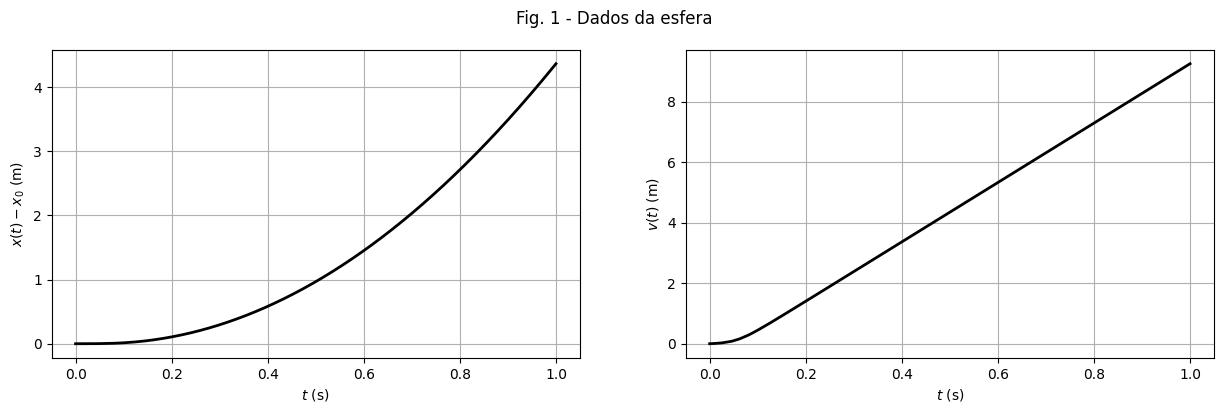

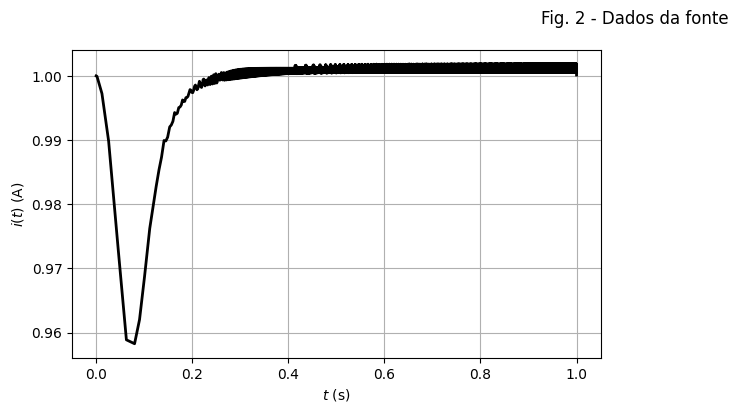

In [ ]:
import matplotlib.pyplot as plt

# --- Position plot --- 
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[1,:]-x0, 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$ (s)');
plt.ylabel('$x(t)-x_0$ (m)');
fig.suptitle('Fig. 1 - Dados da esfera');

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[2,:], 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$ (s)');
plt.ylabel('$v(t)$ (m)');

# --- Source plot ---
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0,:], 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$ (s)');
plt.ylabel('$i(t)$ (A)');
fig.suptitle('Fig. 2 - Dados da fonte');